# FullyConnected on EMNIST (Accuracy, Implicit Model Calibration)

### Imports and Setup

In [1]:
# PyTorch and Models
import torch
from architectures.FullyConnected import FullyConnected

# Helper functions
import datasets.datasets as datasets
from util.common import *

In [2]:
# Make PyTorch deterministic
torch.manual_seed(0)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Load Data, Training and Validation Sets

In [3]:
# Loading dataset into training and validation data
training_loader = datasets.emnist_training_loader()
validation_loader = datasets.emnist_validation_loader()

100%|██████████| 561753746/561753746 [01:34<00:00, 5931035.14it/s]


Extracting ./data\EMNIST\raw\gzip.zip to ./data\EMNIST\raw


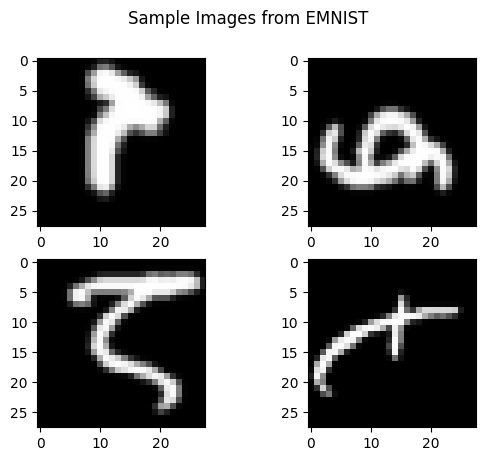

In [4]:
# Some sample images from the dataset
show_images (datasets.emnist_training_dataset(), 4, 'Sample Images from EMNIST')

### Training with Different Label Smoothing Constants

In [ ]:
model_Hard = FullyConnected(1200, 0, num_classes=47)
model_Hard.train_model(device, training_loader, validation_loader, 0, NUM_EPOCHS_FULLY_CONNECTED)

torch.save(model_Hard.state_dict(), "models/FC_EMNIST_Accuracy_IMC/FullyConnected_EMNIST_Hard_Labels.pt")

In [ ]:
model_Smooth_05 = FullyConnected(1200, 0, num_classes=47)
model_Smooth_05.train_model(device, training_loader, validation_loader, 0.05, NUM_EPOCHS_FULLY_CONNECTED)

torch.save(model_Smooth_05.state_dict(), "models/FC_EMNIST_Accuracy_IMC/FullyConnected_EMNIST_Smooth_Labels_005.pt")

In [ ]:
model_Smooth_1 = FullyConnected(1200, 0, num_classes=47)
model_Smooth_1.train_model(device, training_loader, validation_loader, 0.1, NUM_EPOCHS_FULLY_CONNECTED)

torch.save(model_Smooth_1.state_dict(), "models/FC_EMNIST_Accuracy_IMC/FullyConnected_EMNIST_Smooth_Labels_01.pt")

In [ ]:
model_Smooth_15 = FullyConnected(1200, 0, num_classes=47)
model_Smooth_15.train_model(device, training_loader, validation_loader, 0.15, NUM_EPOCHS_FULLY_CONNECTED)

torch.save(model_Smooth_15.state_dict(), "models/FC_EMNIST_Accuracy_IMC/FullyConnected_EMNIST_Smooth_Labels_015.pt")

In [ ]:
model_Smooth_3 = FullyConnected(1200, 0, num_classes=47)
model_Smooth_3.train_model(device, training_loader, validation_loader, 0.3, NUM_EPOCHS_FULLY_CONNECTED)

torch.save(model_Smooth_3.state_dict(), "models/FC_EMNIST_Accuracy_IMC/FullyConnected_EMNIST_Smooth_Labels_03.pt")

### Accuracy and Reliabity

In [4]:
# Temperature for temperature scaling
temperature = 1.14

model_Hard = FullyConnected(1200, num_classes=47)
model_Hard.load_state_dict(torch.load(f"models/FC_EMNIST_Accuracy_IMC/FullyConnected_EMNIST_Hard_Labels.pt", map_location=device))
model_Hard.to(device)

# Compute Accuracy and Reliability
print(f"Error for network using Hard Labels: {100-compute_accuracy(model_Hard, validation_loader, device).cpu().item():.2f}%")
rel_bins_Hard = bin_reliability(model_Hard, validation_loader, device, NUM_BINS)
rel_bins_Temperature = bin_reliability(model_Hard, validation_loader, device, NUM_BINS, temperature)

Error for network using Hard Labels: 11.21%


In [5]:
model_Smooth_05 = FullyConnected(1200, num_classes=47)
model_Smooth_05.load_state_dict(torch.load(f"models/FC_EMNIST_Accuracy_IMC/FullyConnected_EMNIST_Smooth_Labels_005.pt", map_location=device))
model_Smooth_05.to(device)

# Compute Accuracy and Reliability
print(f"Error for network using Label smoothing (alpha = 0.05): {100-compute_accuracy(model_Smooth_05, validation_loader, device).cpu().item():.2f}%")
rel_bins_Smooth = bin_reliability(model_Smooth_05, validation_loader, device, NUM_BINS)

Error for network using Label smoothing (alpha = 0.05): 10.89%


In [6]:
model_Smooth_1 = FullyConnected(1200, num_classes=47)
model_Smooth_1.load_state_dict(torch.load(f"models/FC_EMNIST_Accuracy_IMC/FullyConnected_EMNIST_Smooth_Labels_01.pt", map_location=device))
model_Smooth_1.to(device)

# Compute Accuracy and Reliability
print(f"Error for network using Label smoothing (alpha = 0.1): {100-compute_accuracy(model_Smooth_1, validation_loader, device).cpu().item():.2f}%")
rel_bins_Smooth_2 = bin_reliability(model_Smooth_1, validation_loader, device, NUM_BINS)

Error for network using Label smoothing (alpha = 0.1): 10.65%


In [7]:
model_Smooth_15 = FullyConnected(1200, num_classes=47)
model_Smooth_15.load_state_dict(torch.load(f"models/FC_EMNIST_Accuracy_IMC/FullyConnected_EMNIST_Smooth_Labels_015.pt", map_location=device))
model_Smooth_15.to(device)

# Compute Accuracy and Reliability
print(f"Error for network using Label smoothing (alpha = 0.15): {100-compute_accuracy(model_Smooth_15, validation_loader, device).cpu().item():.2f}%")
rel_bins_Smooth_3 = bin_reliability(model_Smooth_15, validation_loader, device, NUM_BINS)

Error for network using Label smoothing (alpha = 0.15): 10.81%


In [8]:
model_Smooth_3 = FullyConnected(1200, num_classes=47)
model_Smooth_3.load_state_dict(torch.load(f"models/FC_EMNIST_Accuracy_IMC/FullyConnected_EMNIST_Smooth_Labels_03.pt", map_location=device))
model_Smooth_3.to(device)

# Compute Accuracy and Reliability
print(f"Error for network using Label smoothing (alpha = 0.3): {100-compute_accuracy(model_Smooth_3, validation_loader, device).cpu().item():.2f}%")
rel_bins_Smooth_4 = bin_reliability(model_Smooth_3, validation_loader, device, NUM_BINS)

Error for network using Label smoothing (alpha = 0.3): 11.12%


#### Compute ECE Score

In [9]:
print(f"ECE w. Hard Labels: {calculate_ece(rel_bins_Hard):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.05): {calculate_ece(rel_bins_Smooth):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.1): {calculate_ece(rel_bins_Smooth_2):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.15): {calculate_ece(rel_bins_Smooth_3):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.3): {calculate_ece(rel_bins_Smooth_4):.4f}")
print(f"ECE w. Temperature Scaling: {calculate_ece(rel_bins_Temperature):.4f}")

ECE w. Hard Labels: 0.0167
ECE w. Smooth Labels (alpha = 0.05): 0.0559
ECE w. Smooth Labels (alpha = 0.1): 0.1082
ECE w. Smooth Labels (alpha = 0.15): 0.1540
ECE w. Smooth Labels (alpha = 0.3): 0.2878
ECE w. Temperature Scaling: 0.0083


#### Plot Reliability Diagram

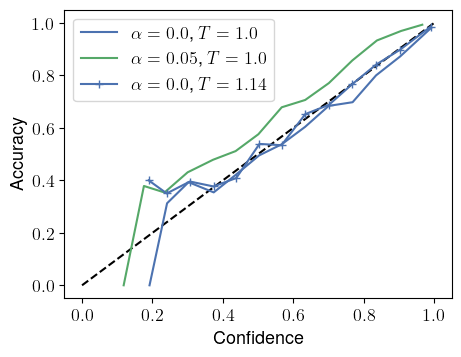

In [10]:
fig = plot_reliability(rel_bins_Hard, rel_bins_Smooth, rel_bins_Temperature, temperature, 0.05)
fig.savefig(format="pdf", fname="figures/reliability_emnist.pdf",bbox_inches='tight')